## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.8

In [8]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 5s 104us/step - loss: 0.8602 - accuracy: 0.6873 - val_loss: 1.7096 - val_accuracy: 0.4846
Epoch 49/50
50000/50000 [==============================] - 5s 103us/step - loss: 0.8559 - accuracy: 0.6895 - val_loss: 1.7744 - val_accuracy: 0.4993
Epoch 50/50
50000/50000 [==============================] - 5s 103us/step - loss: 0.8528 - accuracy: 0.6886 - val_loss: 1.8953 - val_accuracy: 0.4830
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________________________________________________________

50000/50000 [==============================] - 7s 132us/step - loss: 0.7805 - accuracy: 0.7255 - val_loss: 1.4746 - val_accuracy: 0.5275
Epoch 46/50
50000/50000 [==============================] - 6s 122us/step - loss: 0.7664 - accuracy: 0.7301 - val_loss: 1.4560 - val_accuracy: 0.5318
Epoch 47/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.7489 - accuracy: 0.7358 - val_loss: 1.4759 - val_accuracy: 0.5344
Epoch 48/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.7455 - accuracy: 0.7385 - val_loss: 1.5992 - val_accuracy: 0.5116
Epoch 49/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.7166 - accuracy: 0.7473 - val_loss: 1.5105 - val_accuracy: 0.5259
Epoch 50/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.6948 - accuracy: 0.7553 - val_loss: 1.4995 - val_accuracy: 0.5341
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer

Epoch 43/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.3883 - accuracy: 0.5162 - val_loss: 1.4505 - val_accuracy: 0.4930
Epoch 44/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.3817 - accuracy: 0.5185 - val_loss: 1.4485 - val_accuracy: 0.4930
Epoch 45/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.3784 - accuracy: 0.5177 - val_loss: 1.4513 - val_accuracy: 0.4917
Epoch 46/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.3718 - accuracy: 0.5211 - val_loss: 1.4533 - val_accuracy: 0.4917
Epoch 47/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.3655 - accuracy: 0.5231 - val_loss: 1.4334 - val_accuracy: 0.4909
Epoch 48/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.3579 - accuracy: 0.5247 - val_loss: 1.4325 - val_accuracy: 0.4976
Epoch 49/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.3515 - accuracy: 0.5287

Epoch 41/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.8273 - accuracy: 0.3600 - val_loss: 1.8280 - val_accuracy: 0.3613
Epoch 42/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.8240 - accuracy: 0.3626 - val_loss: 1.8235 - val_accuracy: 0.3614
Epoch 43/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.8202 - accuracy: 0.3637 - val_loss: 1.8202 - val_accuracy: 0.3644
Epoch 44/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.8168 - accuracy: 0.3657 - val_loss: 1.8166 - val_accuracy: 0.3614
Epoch 45/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.8132 - accuracy: 0.3665 - val_loss: 1.8132 - val_accuracy: 0.3608
Epoch 46/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.8099 - accuracy: 0.3681 - val_loss: 1.8101 - val_accuracy: 0.3663
Epoch 47/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.8067 - accuracy: 0.3693

Epoch 39/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.1527 - accuracy: 0.2385 - val_loss: 2.1527 - val_accuracy: 0.2369
Epoch 40/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.1499 - accuracy: 0.2399 - val_loss: 2.1499 - val_accuracy: 0.2383
Epoch 41/50
50000/50000 [==============================] - 6s 114us/step - loss: 2.1471 - accuracy: 0.2413 - val_loss: 2.1472 - val_accuracy: 0.2387
Epoch 42/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.1444 - accuracy: 0.2421 - val_loss: 2.1445 - val_accuracy: 0.2397
Epoch 43/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.1417 - accuracy: 0.2435 - val_loss: 2.1418 - val_accuracy: 0.2414
Epoch 44/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.1390 - accuracy: 0.2445 - val_loss: 2.1392 - val_accuracy: 0.2426
Epoch 45/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.1364 - accuracy: 0.2454

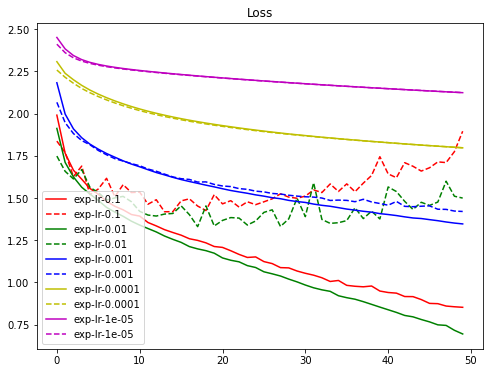

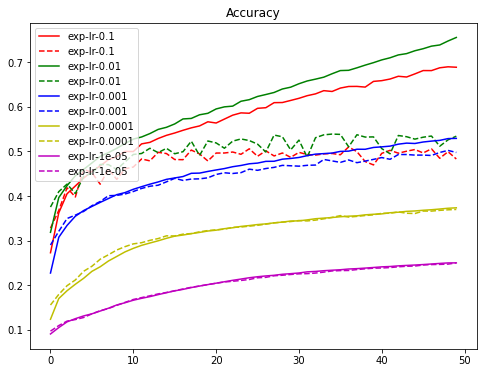

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()